#### IMP:
* Five Number of Summary

In [ ]:
import random
import pandas as pd
import numpy as np
import statistics as st
from scipy import stats as sts
import seaborn as sns

: 

In [105]:
# Get random number from range
# random.randint(10,20)

# get 10 random variables from range of 20-70
data = []
for _ in range(10):
    random_num = random.randint(20,70)
    data.append(random_num)

print(data)

# OR
# WE can also use numpy lib to get N number of random records
data = np.random.randint(20,70,20)
print(data)

[30, 25, 37, 61, 65, 60, 60, 24, 21, 44]
[31 62 64 32 51 55 29 41 69 58 26 25 69 24 28 49 26 34 63 55]


In [106]:
# Calculate centrail tendency

# Mean
mean = np.mean(data)

# Medain
median = np.median(data)

#   MODE
# mode = np.mode(data)  === mode() is not defined in numpy use statestics lib
mode  = st.mode(data)
# we can calculate mode using scipy.stats lib
mode2 = sts.mode(data)

print("Mean=", mean, "Median=", median, "Mode=", mode, "Mode2=", mode2)

Mean= 44.55 Median= 45.0 Mode= 55 Mode2= ModeResult(mode=26, count=2)


## Histogram

d:\Learning\INeuron\Live\07_Statestic\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Learning\INeuron\Live\07_Statestic\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

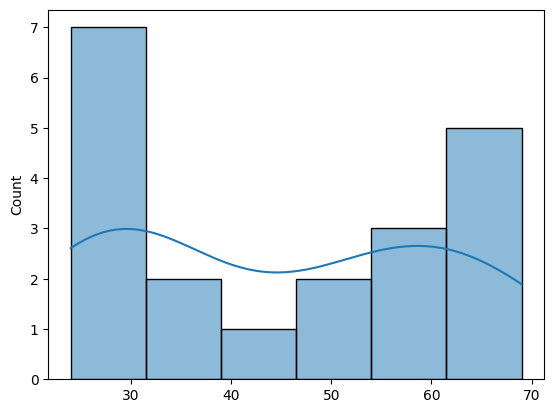

In [107]:
# Plot Histogram
sns.histplot(data, kde=True)

## Box-Plot and 5 Number Summary

In [108]:
q1  = np.percentile(data, 25)
q2  = np.percentile(data, 50)
q3  = np.percentile(data, 75)
q4  = np.percentile(data, 100)

print(f"25_percentile = {q1},\n50_percentile = {q2},\n75_percentile = {q3}, \n100_percentile = {q4}")

25_percentile = 28.75,
50_percentile = 45.0,
75_percentile = 59.0, 
100_percentile = 69.0


<Axes: >

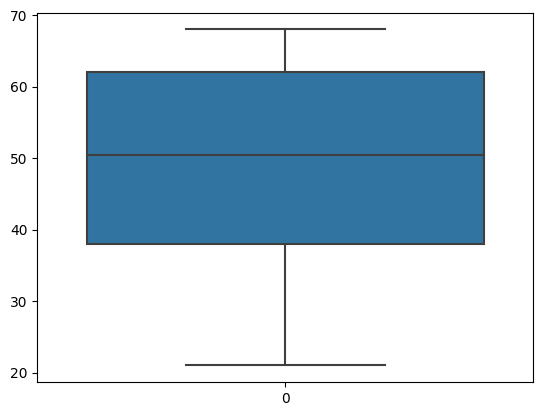

In [60]:
# plot boxplot
sns.boxplot(data)

In [70]:
# Add Outliers
append_ls = [-50, 1, 75, 95, 99, 150, 200]
new_data = np.array([*data, *append_ls])

In [71]:
new_data

array([ 68,  60,  25,  64,  24,  62,  68,  42,  51,  42,  39,  66,  62,
        52,  38,  56,  21,  38,  50,  37, -50,   1,  75,  95,  99, 150,
       200])

<Axes: >

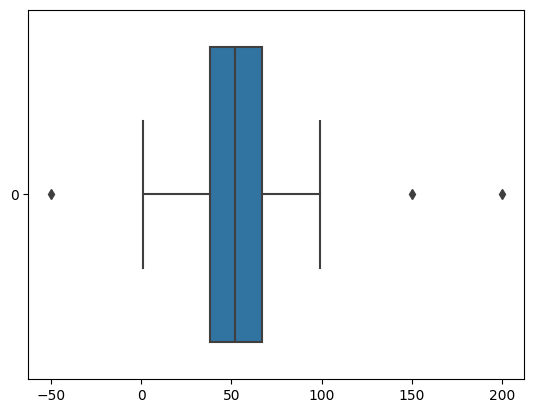

In [74]:
# sns.boxplot(new_data)

# Create horizontal boxplot
sns.boxplot(new_data, orient='h')

#### Calculate 5 number summary manually

In [ ]:
# Calculate IQR (Inter Quartile Range)
IQR = q3 - q1

# Lower and Upper fense
lower_fence = q1 - (IQR * 1.5)
upper_fence = q3 + (IQR * 1.5)

print(f"IQR = {IQR}, lower_fence = {lower_fence}, upper_fence = {upper_fence}")

# Q1
dt = np.sort(data)
len = dt.size
indx = int(len * (0.25))
q1 = dt[indx]

# Q2
indx = int(len * 0.5)
q2 = dt[indx]

# Q3
indx = int(len * 0.75)
q3 = dt[indx]

# Q4 = last element
# indx = int(len * 1)
q4 = dt[-1]

print(f"25_percentile = {q1},\n50_percentile = {q2},\n75_percentile = {q3}, \n100_percentile = {q4}")

### Assignment:

Use 5 sampling techniques to take sample form dataset

In [131]:
# cal variance usinng numpy:
print("varience using numpy lib: ",np.var(data))

# cal variance using statestics lib [takes sample data (n-1)]
print("Varience using Statistics lib (it uses a sample data)",st.variance(data))

# cal variance using statastic lib with population data [take n data]
print("Varience using Statistics lib (it uses a population data)",st.pvariance(data))

# calculate standard deviation
print("Standatd deviation",np.std(data))

# manually calculate variance, standard deviation, mean_absolute_deviation
len = np.size(data)
def cal_variance(data):

    # Variance
    deviation = [(i-mean)**2 for i in data]
    variance = sum(deviation)/len

    # Standard Deviation
    std = np.sqrt(variance)

    # Mean absolute deviation
    absolute_deviation = [abs(i-mean) for i in data]
    mad = sum(absolute_deviation)/len

    return variance, std, mad

print("custom calculation",cal_variance(data))



varience using numpy lib:  257.64750000000004
Varience using Statistics lib (it uses a sample data) 271
Varience using Statistics lib (it uses a population data) 257
Standatd deviation 16.051401807941886
custom calculation (257.6475, 16.051401807941883, 14.95)


### co-variane

In [141]:
df1 = pd.read_csv("dataset/iris.csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [142]:
sample_df = df1.drop("species", axis=1)
sample_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [140]:
# method 1: Using numpy
np.cov(sample_df.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [143]:
# method2: directly find covaricen on a df
sample_df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


### Correlation

In [144]:
sample_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


d:\Learning\INeuron\Live\07_Statestic\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Learning\INeuron\Live\07_Statestic\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='petal_width', ylabel='petal_length'>

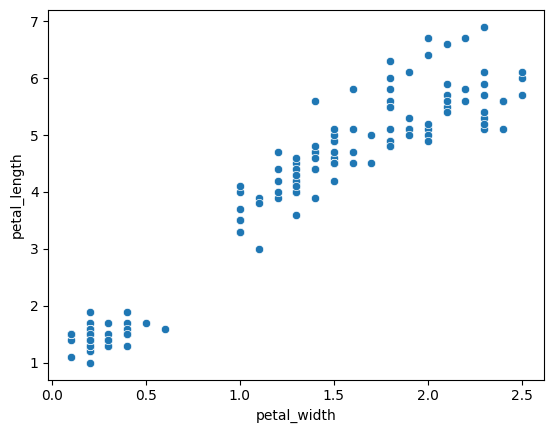

In [146]:
# plot the data on scatter plot
sns.scatterplot(x= sample_df["petal_width"], y = sample_df["petal_length"])

d:\Learning\INeuron\Live\07_Statestic\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Learning\INeuron\Live\07_Statestic\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

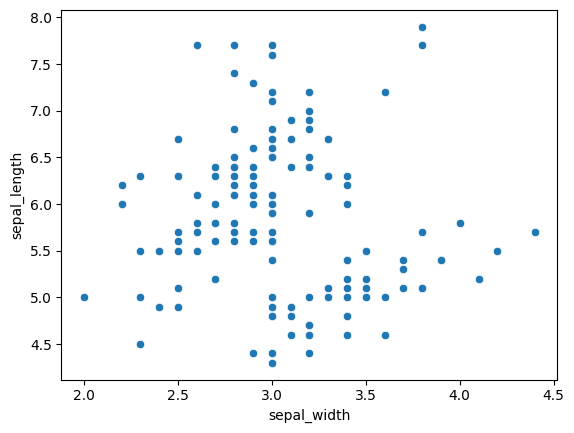

In [149]:
sns.scatterplot(x=sample_df["sepal_width"], y= sample_df["sepal_length"])

## iris dataset

In [8]:
df1 = pd.read_csv("dataset/iris.csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
np.mean(df1['sepal_length'])

5.843333333333334

## Titanic dataset

In [4]:
df2 = pd.read_csv("dataset/titanic_train.csv")
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
np.median(df2['Fare'])

14.4542